# Metallicity Histogram for All-prot Without and With Kinematic Data & xgboost

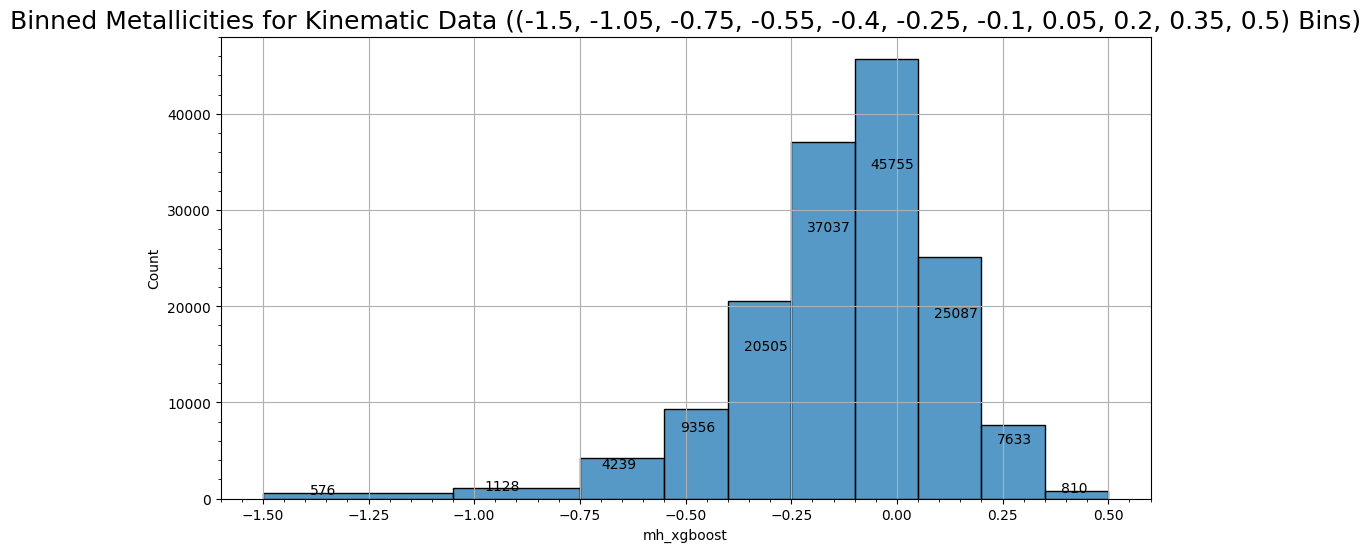

Counts:  [  576  1128  4239  9356 20505 37037 45755 25087  7633   810]
Bin Edges:  [-1.5  -1.05 -0.75 -0.55 -0.4  -0.25 -0.1   0.05  0.2   0.35  0.5 ]


In [22]:
import plotting
import fix
from matplotlib import patches

def nokinematichistogram(n, left, right):
    csv = 'tempcsv/prot_nokinematic_xgboost.csv'
    x = 'mh_xgboost'
    title = f'Binned Metallicities for Non-Kinematic Data ({n} Bins)'

    return plotting.histogram(csv, x, nbins=n, title=title, figsize=(12,6), binrange=[left, right])


def kinematichistogram(n, left, right):
    # used to create data file with xgboost metallicities
    # fix.writecsv('table-1.csv', 'All_prot_kin.csv', 'source_id', 'source_id', 'tempcsv/prot_kinematic_xgboost.csv')

    csv = 'tempcsv/prot_kinematic_xgboost.csv'
    x = 'mh_xgboost'
    title = f'Binned Metallicities for Kinematic Data ({n} Bins)'

    return plotting.histogram(csv, x, nbins=n, title=title, figsize=(12,6), binrange=[left,right])

n = (-1.5, -1.05, -0.75, -0.55, -0.40, -0.25, -0.10, 0.05, 0.20, 0.35, 0.5)

ax, (counts, binedges) = kinematichistogram(n, -1.5, 0.5)
binedges = binedges.round(3)
plotting.addhistcounts(ax, counts)
plotting.plt.show()
print('Counts: ', counts)
print('Bin Edges: ', binedges)



# Boxplots with New Metallicity Bins

## Functions

In [23]:
import fix

def bprpplot(csv, title, destination, palette):
    x = 'bp_rp'
    y = 'Prot'
    hue = 'mh_xgboost'
    xbin = (0.546, 0.719, 0.823, 1.10, 1.5, 1.8, 2.2, 2.5, 3.4)
    xbinlabel = ['1', '2', '3', '4', '5', '6', '7', '8']
    huebin =  (-2, -0.5, 0, 0.5, 2)
    huebinlabel = ['one', 'tow', 'thre', 'four']
    palette = palette

    df = fix.readcsv(csv, x, hue, xbin, xbinlabel, huebin, huebinlabel)
    ax = plotting.boxplotdf(df, x, y, hue, xbinlabel.reverse(), huebinlabel.reverse(), palette)

    fix.plt.title(title, fontsize=18)
    fix.plt.savefig(destination)
    fix.plt.show()

def teffplot(csv, title, destination, palette):
    x = 'teff'
    y = 'Prot'
    hue = 'mh_xgboost'
    xbin = (3000, 4000, 5000, 6000, 7000)
    xbinlabel = ['3k-4k', '4k-5k', '5k-6k', '6k-7k']
    huebin =  (-2, -0.1, 0.1, 2)
    huebinlabel = ['Poor', 'Solar', 'Rich']
    palette = palette

    df = fix.readcsv(csv, x, hue, xbin, xbinlabel, huebin, huebinlabel)
    fix.bprp_to_teff(df['bp_rp'])
    ax = fix.plotting(df, x, y, hue, xbinlabel, reversed(huebinlabel), palette)

    ax.invert_xaxis()
    ax.set_xlabel('Msol')
    fix.plt.title(title, fontsize=18)
    fix.plt.savefig(destination)
    fix.plt.show()

## Examples

### Prot vs. bp-rp

/Users/livelaplove/python/SURP-2025/metallicity/fix.py:136: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby(by=[subbin, upperbin]).size().reset_index(name='counts')


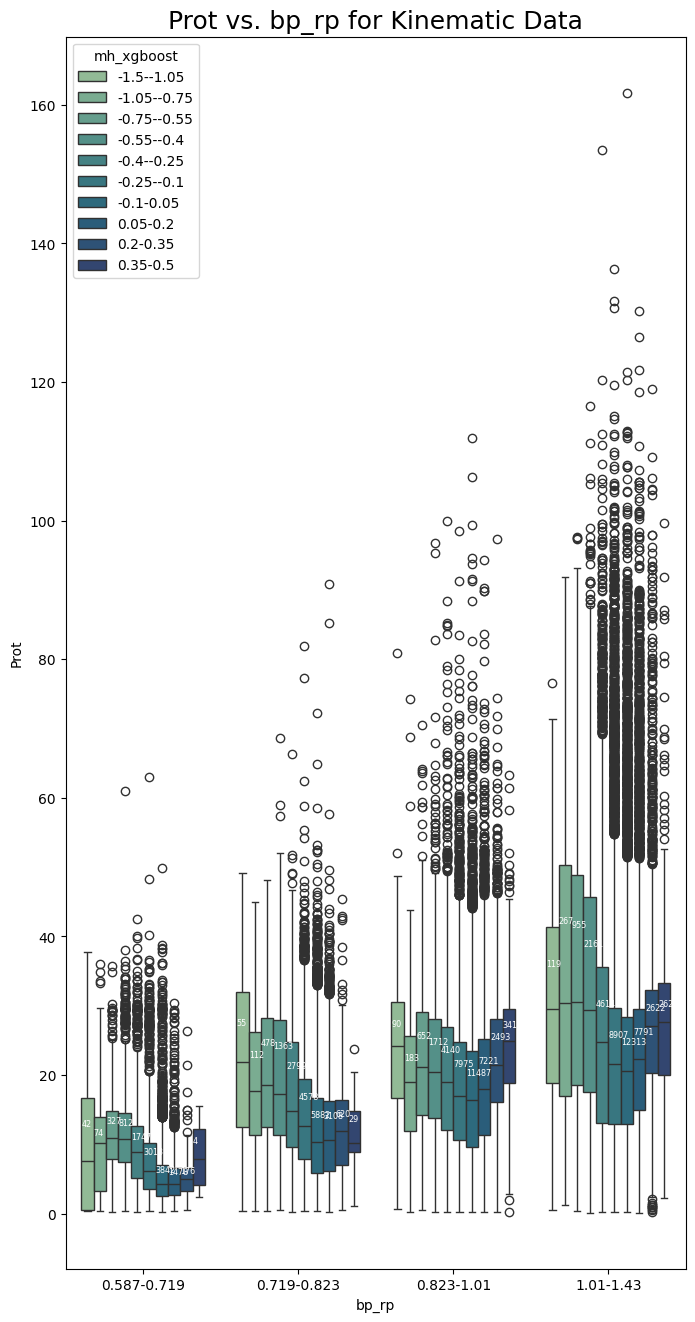

In [24]:
csv = 'tempcsv/prot_kinematic_xgboost.csv'
x = 'bp_rp'
y = 'Prot'
hue = 'mh_xgboost'
xbin = [0.587, 0.719, 0.823, 1.01, 1.43]
xbinlabel = [f'{xbin[i]}-{xbin[i+1]}' for i in range(len(xbin) -1)]
huebin = binedges
huebinlabel = [f'{huebin[i]}-{huebin[i+1]}' for i in range(len(huebin)-1)]
palette = 'crest'
title = 'Prot vs. bp_rp for Kinematic Data'
destination = 'plots/kinematicplots/prot_ci_wholerange.png'

df = fix.readcsv(csv, x, hue, xbin, xbinlabel, huebin, huebinlabel)
ax = plotting.boxplotdf(df, x, y, hue, xbinlabel, huebinlabel, palette, title, show=False)
counts = fix.findbincounts(df, x, hue)

plotting.addboxcounts(ax, counts, size='xx-small')
plotting.plt.savefig(destination)
plotting.plt.show()


### Prot vs. Teff

/Users/livelaplove/python/SURP-2025/metallicity/fix.py:136: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby(by=[subbin, upperbin]).size().reset_index(name='counts')


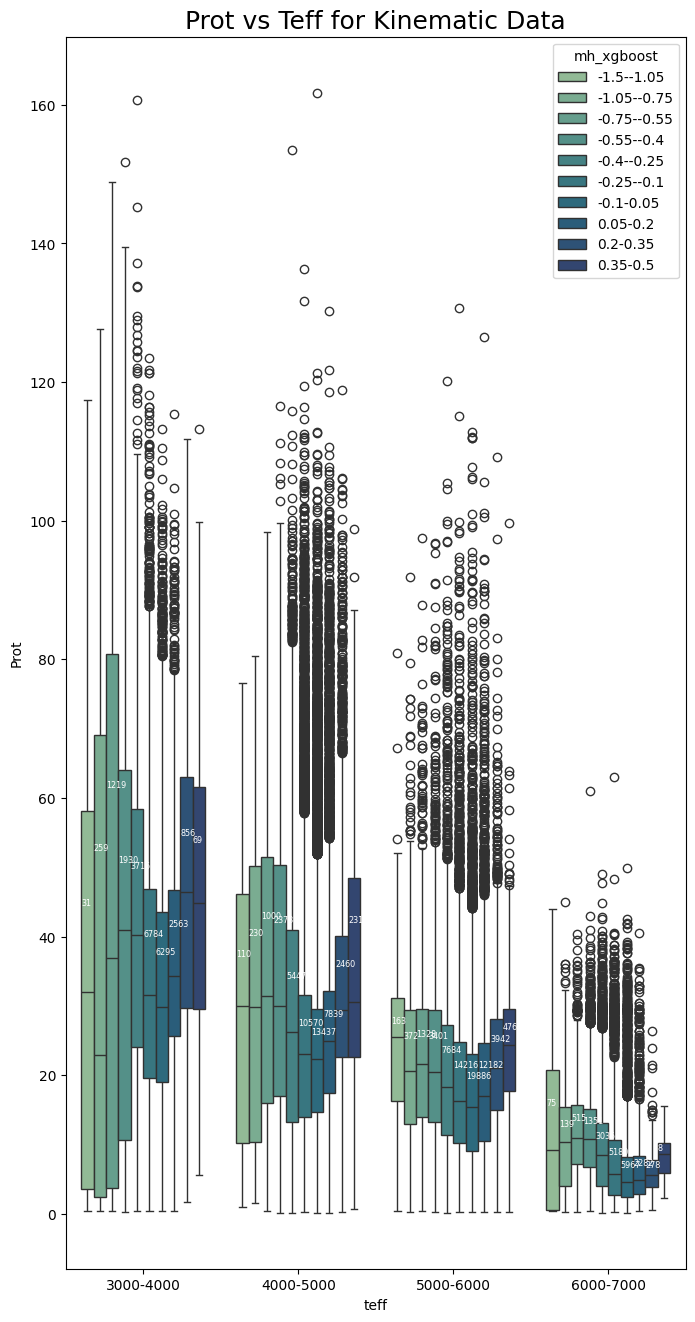

In [25]:
x = 'teff'
xbin = tuple(i for i in range(3000, 8000, 1000))
xbinlabel = [f'{xbin[i]}-{xbin[i+1]}' for i in range(len(xbin)-1)]

df = fix.readcsv(csv, x, hue, xbin, xbinlabel, huebin, huebinlabel)
title = 'Prot vs Teff for Kinematic Data'
destination = 'plots/kinematicplots/prot_teff_wholerange.png'
ax = plotting.boxplotdf(df, x, y, hue, xbinlabel, huebinlabel, palette, title, show=False)
counts = fix.findbincounts(df, x, hue)

plotting.addboxcounts(ax, counts, size='xx-small')
plotting.plt.savefig(destination)
plotting.plt.show()

# 